<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Import Library
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Baca Dataset CSV
</div>

In [2]:
df = pd.read_csv("BTC-USD-5Tahun2023.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-11,6331.879883,6398.919922,6260.209961,6321.200195,6321.200195,3849910000
1,2018-09-12,6317.009766,6363.870117,6265.089844,6351.799805,6351.799805,4064230000
2,2018-09-13,6354.240234,6535.410156,6354.240234,6517.310059,6517.310059,4210910000
3,2018-09-14,6515.410156,6596.100098,6456.169922,6512.709961,6512.709961,4076220000
4,2018-09-15,6509.399902,6561.720215,6493.549805,6543.200195,6543.200195,3216300000


<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi sederhana
</div>

alpha = 143.72517375508687
beta = 0.9684419836605281


C:\Users\ACER\AppData\Local\Temp\ipykernel_11776\2229698016.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, "ro", color="violet", label="AKtual")


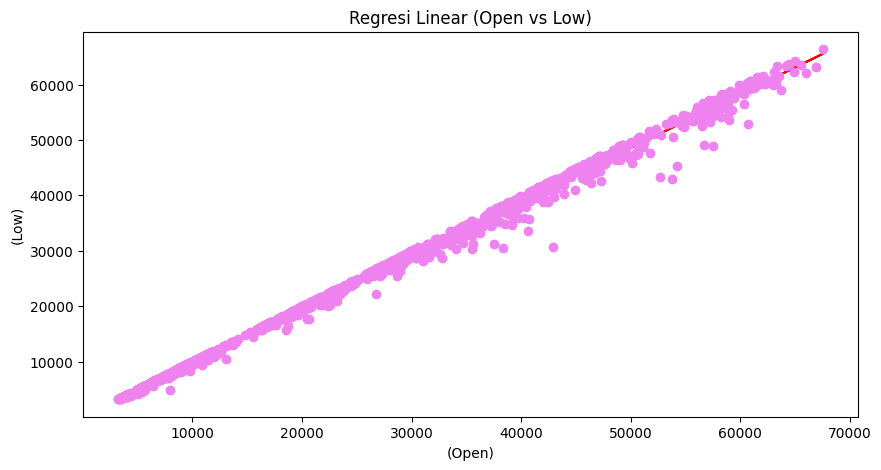

In [3]:
#Var
x = df["Open"]
y = df["Low"]

#Hitung mean x dan y
xmean = np.mean(x)
ymean = np.mean(y)

#Hitung covariance dan variance
df["xycov"] = (df["Open"] - xmean) * (df["Low"] - ymean)
df["xvar"] = (df["Open"] - xmean)**2

#Hitung beta and alpha
beta = df["xycov"].sum() / df["xvar"].sum()
alpha = ymean - (beta*xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

#Fungsi prediksi
ypred = alpha + beta * x     

#Plot regresi untuk data aktual
plt.figure(figsize=(10, 5))
plt.plot(x, ypred, color="red", label="Prediksi")
plt.plot(x, y, "ro", color="violet", label="AKtual")
plt.title("Regresi Linear (Open vs Low)")
plt.xlabel("(Open)")
plt.ylabel("(Low)")

plt.show()

<div style="color:#6CA6C1; font-size:16px; font-weight:bold; text-align:center;">
Regresi Berganda dan Plot 3D
</div>

In [4]:
#Memilih Var 
x1 = df["Open"]
x2 = df["High"]
y = df["Low"]


#Membuat dataframe
df = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": y
})

#Analisis regresi berganda
x =sm.add_constant(df[["x1", "x2"]])
model = sm.OLS(df["y"], x).fit()

#Mendapatkan koefisien regresi
koefisien = model.params

#Scatter plot 3D
scatter_plot = go.Scatter3d(
    x=df["x1"],
    y=df["x2"],
    z=df["y"], 
    mode="markers",
    marker=dict(
        size=5,
        color="blue",
        opacity=0.8
    ),
    name="Data"
)

#Membuat grid untuk permukaan regresi
x1_grid, x2_grid = np.meshgrid(np.linspace(1, 50, 10), np.linspace(3, 60, 10))
y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

#Permukaan regresi 3D
regresion_surface = go.Surface(
    x=x1_grid,
    y=x2_grid,
    z=y_pred,
    colorscale="Purples",
    opacity=0.5,
    name="Garis Regresi"
)

#Membuat layout plot
layout = go.Layout(
    title="Scatter Plot 3D",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="y"
    ),
    showlegend=True 
)

#Membuat figure dengan scatter plot dan permukaan regresi
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

#Menampilkan plot
fig.show()